# Overview of the School Data Analysis Project (4.3.6)

##### Here is the list of deliverables for the analysis of the school district: 
##### •	A high-level snapshot of the district’s key metrics, presented in a table format
##### •	An overview of the key metrics for each school, presented in a table format
##### •	Tables presenting each of the following metrics:
##### o	Top 5 and bottom 5 performing schools, based on the overall passing rate
##### o	The average math score received by students in each grade level at each school
##### o	The average reading score received by students in each grade level at each school
##### o	School performance based on the budget per student
##### o	School performance based on the school size 
##### o	School performance based on the type of school


## Setup: Import, load, view

In [1]:
# Files to load
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

#or you can use os.path.join() for the indirect path method. You would need to "import os".

In [2]:
# Add the Pandas dependency.
import pandas as pd

In [3]:
# Read the school data file and store it in a Pandas DataFrame.
school_data_df = pd.read_csv(school_data_to_load)
school_data_df

# This accomplishes the same as using pd.DataFrame() to convert a list to dictionaries.

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [4]:
# View the first five rows.
school_data_df.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [5]:
# View the last five rows.
school_data_df.tail()

,School ID,school_name,type,size,budget
10,10,Wright High School,Charter,1800,1049400
11,11,Rodriguez High School,District,3999,2547363
12,12,Johnson High School,District,4761,3094650
13,13,Ford High School,District,2739,1763916
14,14,Thomas High School,Charter,1635,1043130


In [6]:
# View a number of rows (ex. 10) of your choosing (from top or bottom)
school_data_df.head(7)

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356


In [7]:
# Read the student data file and store it in a Pandas DataFrame.
student_data_df = pd.read_csv(student_data_to_load)
student_data_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


## Find Missing Values (4.5.1)

##### student_complete.csv has 39,170 rows. It would be very time-consuming to find missing values in a file so large. Luckily, Pandas has a few methods that can help us determine whether there are missing values in large datasets: the count() method,  isnull() method, and  notnull() method.

### The count() Method

##### With the count() method, we can get a count of the rows for each column containing data. By default, "null" values are not counted, so you can often quickly identify which columns have missing data.

In [8]:
# Determine if there are any missing values in the school data.
school_data_df.count()

School ID      15
school_name    15
type           15
size           15
budget         15
dtype: int64

In [9]:
# Determine if there are any missing values in the student data.
student_data_df.count()

Student ID       39170
student_name     39170
gender           39170
grade            39170
school_name      39170
reading_score    39170
math_score       39170
dtype: int64

### The isnull() Method

In [10]:
# Determine if there are any missing values in the school data.
school_data_df.isnull()

,School ID,school_name,type,size,budget
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### The notnull() Method

In [11]:
# Determine if there are not any missing values in the school data.
school_data_df.notnull()

,School ID,school_name,type,size,budget
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


## Counting null and notnull values

In [12]:
# Count how many row have a null value. This is called chaining; joining two or more methods together.

student_data_df.isnull().sum()

Student ID       0
student_name     0
gender           0
grade            0
school_name      0
reading_score    0
math_score       0
dtype: int64

In [13]:
# Determine if there are not any missing values in the student data. This is more straightforward when there are a lot of rows.
student_data_df.notnull().sum()

Student ID       39170
student_name     39170
gender           39170
grade            39170
school_name      39170
reading_score    39170
math_score       39170
dtype: int64

## Check Data Types

In [14]:
# Determine data types for the school DataFrame.
school_data_df.dtypes

School ID       int64
school_name    object
type           object
size            int64
budget          int64
dtype: object

In [15]:
# Determine data types for the student DataFrame.
student_data_df.dtypes

Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score     int64
math_score        int64
dtype: object

In [16]:
# Determine data type for student_name column.
student_data_df.student_name.dtype

dtype('O')

In [17]:
# Second way to determine data type
student_data_df["Student ID"].dtype

dtype('int64')

##### Based on the output, we determined that all of the columns we need to use for calculations are integers. Therefore, we won't need to change the data types for these columns. However, there may be instances in which it's necessary to change the data type. Some CSV and text files, for example, may contain numbers as strings (or objects) rather than integers. These numbers would need to be converted to integers or floats.

## Get the Incorrect Student Names

#### Go to cleaning_student_names.ipynb to see how we got got to the point below, finding prefixes and suffixes to get rid of.

## Correct the Student Names

##### The following actions are from the cleaning_student_names.ipynb results.

In [18]:
# Add each prefix and suffix to remove to a list.
prefixes_suffixes = ["Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss ", " MD", " DDS", " DVM", " PhD"]

In [19]:
# Iterate through the words in the "prefixes_suffixes" list and replace them in the dataframe with an empty space, "".
for word in prefixes_suffixes:
    student_data_df["student_name"] = student_data_df["student_name"].str.replace(word,"")
student_data_df

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90


## 4.7.1 Merge DataFrames
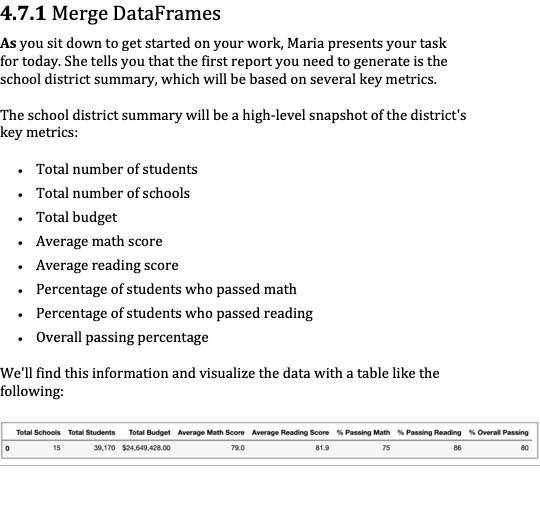

##### In order to get all of this data organized in one table, we'll need to merge the two DataFrames and perform analysis on the single, merged DataFrame. Although we'll be merging the DataFrames, it may be more efficient to use either school_data_df or student_data_df when performing certain calculations. It's a best practice to create a new DataFrame to do calculations. This way, the original data is not affected.

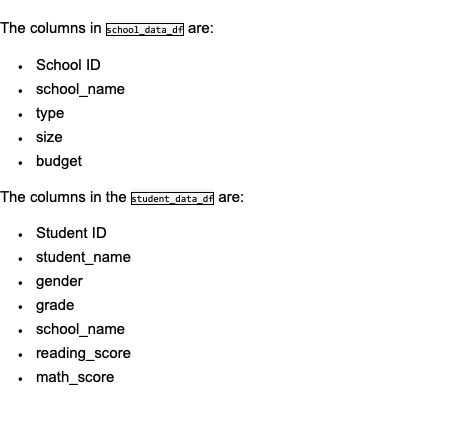

##### Inside the parentheses of the merge() method, we'll do the following:
##### •	Add the DataFrames to be merged.
##### •	Add the shared column to each DataFrame so that the merge can occur.
##### •	Define how the DataFrames should be merged: left, right, inner, or outer. The default is inner. 
##### (You will learn more about merging later in this course.)


In [20]:
# Combine the data into a single dataset.
school_data_complete_df = pd.merge(student_data_df, school_data_df, on=["school_name", "school_name"])
school_data_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


##### Let's break down how the DataFrames are being merged with this code.
##### •	We create a new DataFrame for the merged DataFrames, called school_data_complete_df.
##### •	The new DataFrame is created as a result of merging DataFrame #2 (school_data_df), which is the "right" DataFrame, into DataFrame #1 (student_data_df), which is the "left" DataFrame. We refer to the DataFrames as "left" and "right" to reflect the order they appear inside the parentheses.
##### •	We use the parameter "on," which is equal to a list of the columns that are identical from each DataFrame, in this case, "school_name." We can also use the column name like this: on="school_name".


#### IMPORTANT
##### There may be cases in which you want to merge on a column that has similar information in two separate DataFrames, but is named differently in each—for example, "school_name" in one DataFrame and "high_school" in the second. In these cases, you should rename the columns so that they match. This will help avoid duplicate columns or merging issues.


In [21]:
# Get the total number of students as a list.
student_count = school_data_complete_df["student_name"]
student_count

0           Paul Bradley
1           Victor Smith
2        Kevin Rodriguez
3          Richard Scott
4             Bonnie Ray
              ...       
39165       Donna Howard
39166          Dawn Bell
39167     Rebecca Tanner
39168       Desiree Kidd
39169    Carolyn Jackson
Name: student_name, Length: 39170, dtype: object

## Get the Important Numbers

### Number of Students

In [22]:
# Get the total number of students.
student_count = school_data_complete_df["Student ID"].count()
student_count

39170

In [23]:
# Get the total number of all columns in the dataframe. (Same as above w/o choosing a column.)
student_count2 = school_data_complete_df.count()
student_count2

Student ID       39170
student_name     39170
gender           39170
grade            39170
school_name      39170
reading_score    39170
math_score       39170
School ID        39170
type             39170
size             39170
budget           39170
dtype: int64

### Number of Schools

In [24]:
# Calculate the total number of schools.
school_count = school_data_df["school_name"].count()
school_count

15

##### We can't use the count() method on the school_data_complete_df["school_name"] column because this would give us a value of 39,170. 
##### To use school_data_complete_df, you must first find the unique schools, then measure the length. (two steps)

In [25]:
# Provide a list of schools
school_count_2 = school_data_complete_df["school_name"].unique()
school_count_2

array(['Huang High School', 'Figueroa High School', 'Shelton High School',
       'Hernandez High School', 'Griffin High School',
       'Wilson High School', 'Cabrera High School', 'Bailey High School',
       'Holden High School', 'Pena High School', 'Wright High School',
       'Rodriguez High School', 'Johnson High School', 'Ford High School',
       'Thomas High School'], dtype=object)

In [26]:
len(school_data_complete_df["school_name"].unique())

15

### Total budget

In [27]:
# Calculate the total budget.
total_budget = school_data_df["budget"].sum()
total_budget

24649428

##### When we apply the sum() method on the school_data_complete_df["budget"] column, we get a huge number, and based on our Excel calculation, it's incorrect. Our code summed all 39,170 rows in the "budget" column.

### Score Averages

In [28]:
average_reading_score = school_data_complete_df["reading_score"].mean()
average_reading_score

81.87784018381414

In [29]:
# Calculate the average math score.
average_math_score = school_data_complete_df["math_score"].mean()
average_math_score

78.98537145774827

### Passing Percentages

##### To get the percentage of students who passed math and reading, we will write code to:
##### 1.	Determine the passing grade.
##### 2.	Get the number of students who passed math and reading in separate DataFrames.
##### 3.	Calculate the number of students who passed math and reading.
##### 4.	Calculate the percentage of students who passed math and reading.

##### To get the overall passing percentage, we will write code to:
##### 1.	Get the number of students who passed both math and reading in a DataFrame.
##### 2.	Calculate the number of students who passed both math and reading.
##### 3.	Calculate the percentage of students who passed both math and reading.


In [30]:
passing_math = school_data_complete_df["math_score"] >= 70
passing_math

0         True
1        False
2        False
3        False
4         True
         ...  
39165     True
39166     True
39167     True
39168     True
39169     True
Name: math_score, Length: 39170, dtype: bool

In [31]:
passing_reading = school_data_complete_df["reading_score"] >= 70
passing_reading

0        False
1         True
2         True
3        False
4         True
         ...  
39165     True
39166     True
39167     True
39168     True
39169     True
Name: reading_score, Length: 39170, dtype: bool

## Get the Number of Students Who Passed Math & Reading

In [32]:
# Get all the students who are passing math in a new DataFrame.
passing_math = school_data_complete_df[school_data_complete_df["math_score"] >= 70]
passing_math.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635


In [33]:
# Get all the students that are passing reading in a new DataFrame.
passing_reading = school_data_complete_df[school_data_complete_df["reading_score"] >= 70]
passing_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635


In [34]:
passing_math.count()

Student ID       29370
student_name     29370
gender           29370
grade            29370
school_name      29370
reading_score    29370
math_score       29370
School ID        29370
type             29370
size             29370
budget           29370
dtype: int64

In [35]:
# Calculate the number of students passing math.
passing_math_count = passing_math["student_name"].count()

In [36]:
# Calculate the number of students passing reading.
passing_reading_count = passing_reading["student_name"].count()

In [37]:
print(passing_reading_count)
print(passing_math_count)

33610
29370


## Get the Passing Percentages (4.7.6)

##### Recall that the student count was calculated using this code: school_data_complete_df["Student ID"].count()

In [38]:
# Calculate the percent that passed math.
passing_math_percentage = passing_math_count / float(student_count) * 100
print(passing_math_percentage)

74.9808526933878


In [39]:
# Calculate the percent that passed reading.
passing_reading_percentage = passing_reading_count / float(student_count) * 100
print(passing_reading_percentage)

85.80546336482001


In [40]:
# Calculate the students who passed both math and reading.
passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["reading_score"] >= 70)]

passing_math_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635


In [41]:
# One way to calculate how many students passed both math and reading.
passing_math_reading["student_name"].count()

25528

In [42]:
# Another way to calculate how many students passed both math and reading.
passing_math_reading.student_name.count()

25528

In [43]:
# Assign a value to the calculation of the number of students who passed both math and reading.
overall_passing_math_reading_count = passing_math_reading["student_name"].count()
overall_passing_math_reading_count

25528

In [44]:
# Calculate the overall passing percentage.
overall_passing_percentage = overall_passing_math_reading_count / student_count * 100
overall_passing_percentage

65.17232575950983

## Create a new dataframe with all the pertinent info.

In [45]:
# Adding a list of values with keys to create a new DataFrame.
district_summary_df = pd.DataFrame(
          [{"Total Schools": school_count,
          "Total Students": student_count,
          "Total Budget": total_budget,
          "Average Math Score": average_math_score,
          "Average Reading Score": average_reading_score,
          "% Passing Math": passing_math_percentage,
         "% Passing Reading": passing_reading_percentage,
        "% Overall Passing": overall_passing_percentage}])
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


# Formatting

In [46]:
# Format the "Total Students" to have the comma for a thousands separator.
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)

district_summary_df["Total Students"]

0    39,170
Name: Total Students, dtype: object

In [47]:
# Format "Total Budget" to have the comma for a thousands separator, a decimal separator, and a "$".
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
district_summary_df["Total Budget"]

0    $24,649,428.00
Name: Total Budget, dtype: object

In [48]:
# Format the columns.
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)

district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)

district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.0f}".format)

district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.0f}".format)

district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.0f}".format)

In [49]:
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


In [50]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["Total Schools", "Total Students", "Total Budget","Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"]

# Assign district summary df the new column order.
district_summary_df = district_summary_df[new_column_order]
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


In [51]:
# Determine the school type.
per_school_types = school_data_df.set_index(["school_name"])["type"]
per_school_types

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [52]:
# Add the per_school_types into a DataFrame for testing.
df = pd.DataFrame(per_school_types)
df

,type
school_name,
Huang High School,District
Figueroa High School,District
Shelton High School,Charter
Hernandez High School,District
Griffin High School,Charter
Wilson High School,Charter
Cabrera High School,Charter
Bailey High School,District
Holden High School,Charter


In [53]:
# Calculate the total student count.
per_school_counts = school_data_df["size"]
per_school_counts

0     2917
1     2949
2     1761
3     4635
4     1468
5     2283
6     1858
7     4976
8      427
9      962
10    1800
11    3999
12    4761
13    2739
14    1635
Name: size, dtype: int64

In [54]:
# Calculate the total student count by school (school as index).
per_school_counts = school_data_df.set_index(["school_name"])["size"]
per_school_counts

school_name
Huang High School        2917
Figueroa High School     2949
Shelton High School      1761
Hernandez High School    4635
Griffin High School      1468
Wilson High School       2283
Cabrera High School      1858
Bailey High School       4976
Holden High School        427
Pena High School          962
Wright High School       1800
Rodriguez High School    3999
Johnson High School      4761
Ford High School         2739
Thomas High School       1635
Name: size, dtype: int64

In [55]:
# Calculate the total student count another way.
per_school_counts = school_data_complete_df["school_name"].value_counts()
per_school_counts

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

In [56]:
school_data_df

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [57]:
# Pull the total school budget.
per_school_budget = school_data_df.set_index(["school_name"])["budget"]
per_school_budget

school_name
Huang High School        1910635
Figueroa High School     1884411
Shelton High School      1056600
Hernandez High School    3022020
Griffin High School       917500
Wilson High School       1319574
Cabrera High School      1081356
Bailey High School       3124928
Holden High School        248087
Pena High School          585858
Wright High School       1049400
Rodriguez High School    2547363
Johnson High School      3094650
Ford High School         1763916
Thomas High School       1043130
Name: budget, dtype: int64

In [58]:
# Calculate the per capita spending (the budget per student per school).
per_school_capita = per_school_budget / per_school_counts
per_school_capita

Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [59]:
# Calculate the math scores.
student_school_math = student_data_df.set_index(["school_name"])["math_score"]
student_school_math

# Didn't work because there aren't any columns containing grades, and there are too many occurences of school_names.

school_name
Huang High School     79
Huang High School     61
Huang High School     60
Huang High School     58
Huang High School     84
                      ..
Thomas High School    90
Thomas High School    70
Thomas High School    84
Thomas High School    90
Thomas High School    75
Name: math_score, Length: 39170, dtype: int64

In [60]:
# Calculate the average math scores.
per_school_averages = school_data_complete_df.groupby(["school_name"]).mean()
per_school_averages

# The output will be the average of each column in the school_data_complete_df DataFrame: 
# Not what we want.

,Student ID,reading_score,math_score,School ID,size,budget
school_name,,,,,,
Bailey High School,20358.5,81.033963,77.048432,7.0,4976.0,3124928.0
Cabrera High School,16941.5,83.975780,83.061895,6.0,1858.0,1081356.0
Figueroa High School,4391.0,81.158020,76.711767,1.0,2949.0,1884411.0
Ford High School,36165.0,80.746258,77.102592,13.0,2739.0,1763916.0
Griffin High School,12995.5,83.816757,83.351499,4.0,1468.0,917500.0
Hernandez High School,9944.0,80.934412,77.289752,3.0,4635.0,3022020.0
Holden High School,23060.0,83.814988,83.803279,8.0,427.0,248087.0
Huang High School,1458.0,81.182722,76.629414,0.0,2917.0,1910635.0
Johnson High School,32415.0,80.966394,77.072464,12.0,4761.0,3094650.0


In [61]:
# Calculate the average test scores.
per_school_math = school_data_complete_df.groupby(["school_name"]).mean()["math_score"]
per_school_math

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [62]:
per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]
per_school_reading

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [63]:
# To get the passing percentages, we need to:
 # 1. Determine what is the passing grade.
 # 2. Get the number of students who passed math and reading.
 # 3. Get the students who passed math and passed reading

In [64]:
# 1. Calculate the passing scores by creating a filtered DataFrame.
per_school_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]
per_school_passing_math

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [65]:
per_school_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)]
per_school_passing_reading

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [66]:
# 2. Calculate the number of students passing math and passing reading by school. (one or other)
per_school_passing_math = per_school_passing_math.groupby(["school_name"]).count()["student_name"]
per_school_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: student_name, dtype: int64

In [67]:
# 2. Calculate the number of students passing math and passing reading by school. (one or other)
per_school_passing_reading = per_school_passing_reading.groupby(["school_name"]).count()["student_name"]
per_school_passing_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
Name: student_name, dtype: int64

In [68]:
# 2. Calculate the percentage of passing math and reading scores per school.
per_school_passing_math = per_school_passing_math / per_school_counts * 100
per_school_passing_math

Bailey High School       66.680064
Cabrera High School      94.133477
Figueroa High School     65.988471
Ford High School         68.309602
Griffin High School      93.392371
Hernandez High School    66.752967
Holden High School       92.505855
Huang High School        65.683922
Johnson High School      66.057551
Pena High School         94.594595
Rodriguez High School    66.366592
Shelton High School      93.867121
Thomas High School       93.272171
Wilson High School       93.867718
Wright High School       93.333333
dtype: float64

In [69]:
# 2. Calculate the percentage of passing math and reading scores per school.
per_school_passing_reading = per_school_passing_reading / per_school_counts * 100
per_school_passing_reading

Bailey High School       81.933280
Cabrera High School      97.039828
Figueroa High School     80.739234
Ford High School         79.299014
Griffin High School      97.138965
Hernandez High School    80.862999
Holden High School       96.252927
Huang High School        81.316421
Johnson High School      81.222432
Pena High School         95.945946
Rodriguez High School    80.220055
Shelton High School      95.854628
Thomas High School       97.308869
Wilson High School       96.539641
Wright High School       96.611111
dtype: float64

In [70]:
# 3. Calculate the students who passed both math and reading.
per_passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["reading_score"] >= 70)]

per_passing_math_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635


In [71]:
# Calculate the number of students who passed both math and reading.
per_passing_math_reading = per_passing_math_reading.groupby(["school_name"]).count()["student_name"]
per_passing_math_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
Name: student_name, dtype: int64

In [72]:
# Calculate the overall passing percentage.
per_overall_passing_percentage = per_passing_math_reading / per_school_counts * 100
per_overall_passing_percentage

Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [73]:
# Adding a list of values with keys to create a new DataFrame.

per_school_summary_df = pd.DataFrame({
             "School Type": per_school_types,
             "Total Students": per_school_counts,
             "Total School Budget": per_school_budget,
             "Per Student Budget": per_school_capita,
             "Average Math Score": per_school_math,
           "Average Reading Score": per_school_reading,
           "% Passing Math": per_school_passing_math,
           "% Passing Reading": per_school_passing_reading,
           "% Overall Passing": per_overall_passing_percentage})
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455


In [74]:
# Format the Total School Budget and the Per Student Budget columns.
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)

per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)


# Display the data frame
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455


In [75]:
# Sort and show top five schools.
top_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)

top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [119]:
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)

bottom_schools.tail()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675,Large (2000-5000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675,Large (2000-5000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675,Large (2000-5000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247,$630-644,Large (2000-5000)


In [121]:
# Sort and show top five schools. Using ascending (which is also default)
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=True)

bottom_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247,$630-644,Large (2000-5000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675,Large (2000-5000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675,Large (2000-5000)


In [78]:
# Create a grade level DataFrames.
ninth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "9th")]

tenth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "10th")]

eleventh_graders = school_data_complete_df[(school_data_complete_df["grade"] == "11th")]

twelfth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "12th")]

In [79]:
ninth_graders.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
12,12,Brittney Walker,F,9th,Huang High School,64,79,0,District,2917,1910635
13,13,William Long,M,9th,Huang High School,71,79,0,District,2917,1910635


In [80]:
# Group each school Series by the school name for the average math score.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]

tenth_grade_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]

eleventh_grade_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]

twelfth_grade_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

In [81]:
ninth_grade_math_scores

school_name
Bailey High School       77.083676
Cabrera High School      83.094697
Figueroa High School     76.403037
Ford High School         77.361345
Griffin High School      82.044010
Hernandez High School    77.438495
Holden High School       83.787402
Huang High School        77.027251
Johnson High School      77.187857
Pena High School         83.625455
Rodriguez High School    76.859966
Shelton High School      83.420755
Thomas High School       83.590022
Wilson High School       83.085578
Wright High School       83.264706
Name: math_score, dtype: float64

In [82]:
tenth_grade_math_scores

school_name
Bailey High School       76.996772
Cabrera High School      83.154506
Figueroa High School     76.539974
Ford High School         77.672316
Griffin High School      84.229064
Hernandez High School    77.337408
Holden High School       83.429825
Huang High School        75.908735
Johnson High School      76.691117
Pena High School         83.372000
Rodriguez High School    76.612500
Shelton High School      82.917411
Thomas High School       83.087886
Wilson High School       83.724422
Wright High School       84.010288
Name: math_score, dtype: float64

In [83]:
eleventh_grade_math_scores

school_name
Bailey High School       77.515588
Cabrera High School      82.765560
Figueroa High School     76.884344
Ford High School         76.918058
Griffin High School      83.842105
Hernandez High School    77.136029
Holden High School       85.000000
Huang High School        76.446602
Johnson High School      77.491653
Pena High School         84.328125
Rodriguez High School    76.395626
Shelton High School      83.383495
Thomas High School       83.498795
Wilson High School       83.195326
Wright High School       83.836782
Name: math_score, dtype: float64

In [84]:
# Group each school Series by the school name for the average reading score.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]

tenth_grade_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]

eleventh_grade_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]

twelfth_grade_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]

In [85]:
twelfth_grade_reading_scores

school_name
Bailey High School       80.912451
Cabrera High School      84.287958
Figueroa High School     81.384863
Ford High School         80.662338
Griffin High School      84.013699
Hernandez High School    80.857143
Holden High School       84.698795
Huang High School        80.305983
Johnson High School      81.227564
Pena High School         84.591160
Rodriguez High School    80.376426
Shelton High School      82.781671
Thomas High School       83.831361
Wilson High School       84.317673
Wright High School       84.073171
Name: reading_score, dtype: float64

In [86]:
# Combine each Series for average math scores by school into single DataFrame.
math_scores_by_grade = pd.DataFrame({
               "9th": ninth_grade_math_scores,
               "10th": tenth_grade_math_scores,
               "11th": eleventh_grade_math_scores,
               "12th": twelfth_grade_math_scores})

math_scores_by_grade.head()

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164


In [87]:
# Combine each Series for average reading scores by school into single DataFrame.
reading_scores_by_grade = pd.DataFrame({
              "9th": ninth_grade_reading_scores,
              "10th": tenth_grade_reading_scores,
              "11th": eleventh_grade_reading_scores,
              "12th": twelfth_grade_reading_scores})

reading_scores_by_grade.head()

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699


In [88]:
# Format each grade column.
math_scores_by_grade["9th"] = math_scores_by_grade["9th"].map("{:.1f}".format)

math_scores_by_grade["10th"] = math_scores_by_grade["10th"].map("{:.1f}".format)

math_scores_by_grade["11th"] = math_scores_by_grade["11th"].map("{:.1f}".format)

math_scores_by_grade["12th"] = math_scores_by_grade["12th"].map("{:.1f}".format)

  # Make sure the columns are in the correct order.
math_scores_by_grade = math_scores_by_grade[
                 ["9th", "10th", "11th", "12th"]]

  # Remove the index name.
math_scores_by_grade.index.name = None
  # Display the DataFrame.
math_scores_by_grade.head()

,9th,10th,11th,12th
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4


In [89]:
# Format each grade column.
reading_scores_by_grade["9th"] = reading_scores_by_grade["9th"].map("{:,.1f}".format)

reading_scores_by_grade["10th"] = reading_scores_by_grade["10th"].map("{:,.1f}".format)

reading_scores_by_grade["11th"] = reading_scores_by_grade["11th"].map("{:,.1f}".format)

reading_scores_by_grade["12th"] = reading_scores_by_grade["12th"].map("{:,.1f}".format)

  # Make sure the columns are in the correct order.
reading_scores_by_grade = reading_scores_by_grade[
                 ["9th", "10th", "11th", "12th"]]

  # Remove the index name.
reading_scores_by_grade.index.name = None
  # Display the data frame.
reading_scores_by_grade.head()

,9th,10th,11th,12th
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0


In [90]:
# Get the descriptive statistics for the per_school_capita (spending per student).
per_school_capita.describe()

count     15.000000
mean     620.066667
std       28.544368
min      578.000000
25%      591.500000
50%      628.000000
75%      641.500000
max      655.000000
dtype: float64

In [91]:
# Cut the per_school_capita into the spending ranges.
spending_bins = [0, 585, 615, 645, 675]
pd.cut(per_school_capita, spending_bins)

Bailey High School       (615, 645]
Cabrera High School        (0, 585]
Figueroa High School     (615, 645]
Ford High School         (615, 645]
Griffin High School      (615, 645]
Hernandez High School    (645, 675]
Holden High School         (0, 585]
Huang High School        (645, 675]
Johnson High School      (645, 675]
Pena High School         (585, 615]
Rodriguez High School    (615, 645]
Shelton High School      (585, 615]
Thomas High School       (615, 645]
Wilson High School         (0, 585]
Wright High School         (0, 585]
dtype: category
Categories (4, interval[int64]): [(0, 585] < (585, 615] < (615, 645] < (645, 675]]

In [92]:
# Cut the per_school_capita into the spending ranges.
spending_bins = [585, 615, 645, 675]
pd.cut(per_school_capita, spending_bins)

Bailey High School       (615.0, 645.0]
Cabrera High School                 NaN
Figueroa High School     (615.0, 645.0]
Ford High School         (615.0, 645.0]
Griffin High School      (615.0, 645.0]
Hernandez High School    (645.0, 675.0]
Holden High School                  NaN
Huang High School        (645.0, 675.0]
Johnson High School      (645.0, 675.0]
Pena High School         (585.0, 615.0]
Rodriguez High School    (615.0, 645.0]
Shelton High School      (585.0, 615.0]
Thomas High School       (615.0, 645.0]
Wilson High School                  NaN
Wright High School                  NaN
dtype: category
Categories (3, interval[int64]): [(585, 615] < (615, 645] < (645, 675]]

In [93]:
# Cut the per_school_capita into the spending ranges again, with the purpose of getting the bins to have an even number of schools in each.
spending_bins = [0, 585, 630, 645, 675]
per_school_capita.groupby(pd.cut(per_school_capita, spending_bins)).count()

(0, 585]      4
(585, 630]    4
(630, 645]    4
(645, 675]    3
dtype: int64

In [94]:
# Establish the spending bins and group names.
spending_bins = [0, 585, 630, 645, 675]
group_names = ["<$584", "$585-629", "$630-644", "$645-675"]

In [95]:
# Categorize spending based on the bins.
per_school_summary_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=group_names)

per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$584
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-629


In [96]:
# Calculate averages for the desired columns.
spending_math_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]

spending_reading_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]

spending_passing_math = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]

spending_passing_reading = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]

overall_passing_spending = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [97]:
overall_passing_spending

Spending Ranges (Per Student)
<$584       90.369459
$585-629    81.418596
$630-644    62.857656
$645-675    53.526855
Name: % Overall Passing, dtype: float64

In [98]:
# Assemble into DataFrame.
spending_summary_df = pd.DataFrame({
          "Average Math Score" : spending_math_scores,
          "Average Reading Score": spending_reading_scores,
          "% Passing Math": spending_passing_math,
          "% Passing Reading": spending_passing_reading,
          "% Overall Passing": overall_passing_spending})

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.455399,83.933814,93.460096,96.610877,90.369459
$585-629,81.899826,83.155286,87.133538,92.718205,81.418596
$630-644,78.518855,81.624473,73.484209,84.391793,62.857656
$645-675,76.997210,81.027843,66.164813,81.133951,53.526855


In [99]:
# Formatting
spending_summary_df["Average Math Score"] = spending_summary_df["Average Math Score"].map("{:.1f}".format)

spending_summary_df["Average Reading Score"] = spending_summary_df["Average Reading Score"].map("{:.1f}".format)

spending_summary_df["% Passing Math"] = spending_summary_df["% Passing Math"].map("{:.0f}".format)

spending_summary_df["% Passing Reading"] = spending_summary_df["% Passing Reading"].map("{:.0f}".format)

spending_summary_df["% Overall Passing"] = spending_summary_df["% Overall Passing"].map("{:.0f}".format)

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.5,83.9,93,97,90
$585-629,81.9,83.2,87,93,81
$630-644,78.5,81.6,73,84,63
$645-675,77.0,81.0,66,81,54


In [100]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [101]:
# Categorize spending based on the bins.
per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], size_bins, labels=group_names)

per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629,Medium (1000-2000)


In [102]:
# Calculate averages for the desired columns.
size_math_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Math Score"]

size_reading_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Reading Score"]

size_passing_math = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Math"]

size_passing_reading = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Reading"]

size_overall_passing = per_school_summary_df.groupby(["School Size"]).mean()["% Overall Passing"]

In [103]:
# Assemble into DataFrame.
size_summary_df = pd.DataFrame({
          "Average Math Score" : size_math_scores,
          "Average Reading Score": size_reading_scores,
          "% Passing Math": size_passing_math,
          "% Passing Reading": size_passing_reading,
          "% Overall Passing": size_overall_passing})

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


In [104]:
# Formatting.
size_summary_df["Average Math Score"] = size_summary_df["Average Math Score"].map("{:.1f}".format)

size_summary_df["Average Reading Score"] = size_summary_df["Average Reading Score"].map("{:.1f}".format)

size_summary_df["% Passing Math"] = size_summary_df["% Passing Math"].map("{:.0f}".format)

size_summary_df["% Passing Reading"] = size_summary_df["% Passing Reading"].map("{:.0f}".format)

size_summary_df["% Overall Passing"] = size_summary_df["% Overall Passing"].map("{:.0f}".format)

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8,83.9,94,96,90
Medium (1000-2000),83.4,83.9,94,97,91
Large (2000-5000),77.7,81.3,70,83,58


In [105]:
# Calculate averages for the desired columns.
type_math_scores = per_school_summary_df.groupby(["School Type"]).mean()["Average Math Score"]

type_reading_scores = per_school_summary_df.groupby(["School Type"]).mean()["Average Reading Score"]

type_passing_math = per_school_summary_df.groupby(["School Type"]).mean()["% Passing Math"]

type_passing_reading = per_school_summary_df.groupby(["School Type"]).mean()["% Passing Reading"]

type_overall_passing = per_school_summary_df.groupby(["School Type"]).mean()["% Overall Passing"]

In [106]:
# Assemble into DataFrame.
type_summary_df = pd.DataFrame({
          "Average Math Score" : type_math_scores,
          "Average Reading Score": type_reading_scores,
          "% Passing Math": type_passing_math,
          "% Passing Reading": type_passing_reading,
          "% Overall Passing": type_overall_passing})

type_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


In [107]:
# Formatting
type_summary_df["Average Math Score"] = type_summary_df["Average Math Score"].map("{:.1f}".format)

type_summary_df["Average Reading Score"] = type_summary_df["Average Reading Score"].map("{:.1f}".format)

type_summary_df["% Passing Math"] = type_summary_df["% Passing Math"].map("{:.0f}".format)

type_summary_df["% Passing Reading"] = type_summary_df["% Passing Reading"].map("{:.0f}".format)

type_summary_df["% Overall Passing"] = type_summary_df["% Overall Passing"].map("{:.0f}".format)

type_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.5,83.9,94,97,90
District,77.0,81.0,67,81,54


# FINAL PRINTOUTS

In [108]:
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


In [109]:
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$584,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675,Large (2000-5000)
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-629,Small (<1000)


In [110]:
top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [111]:
bottom_schools.tail()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769


In [113]:
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9
Pena High School,83.6,83.4,84.3,84.1


In [114]:
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2
Pena High School,83.8,83.6,84.3,84.6


In [115]:
spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.5,83.9,93,97,90
$585-629,81.9,83.2,87,93,81
$630-644,78.5,81.6,73,84,63
$645-675,77.0,81.0,66,81,54


In [116]:
size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8,83.9,94,96,90
Medium (1000-2000),83.4,83.9,94,97,91
Large (2000-5000),77.7,81.3,70,83,58


In [117]:
type_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.5,83.9,94,97,90
District,77.0,81.0,67,81,54
